# Elite Academy

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4723737184/in/photolist-AnbBkg-88zTZp-ND1MWm-q2jK2i-oyiLca-dapWFp-bWYZGz-cemfyA-c5RPLS-bpXDry-aKmGAt-az4XYn-9XLU4D-9XPMjh-9XPMqw-9KBauT-9BjBnh-9wxrcs-8UWbsi-8TpVug-8xCmYu-8cqouy-7r34KX-7cWHMd-79vjSo-59qUNC-6vT1cM-6kynp4-6ciDzB-65TgBb-5Y1a8T-5QB2pe-5HjGxR-5ye8QF-5yhNus-5tR7MY-5nnFth-5niqFn-5abLDr" title="Classic Geodesic Dome"><img src="https://live.staticflickr.com/1210/4723737184_4c33270733_c.jpg" width="800" height="600" alt="Classic Geodesic Dome"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
<br/>
Long Beach: adjacent the [Queen Mary](https://flic.kr/p/cGoQ29) (former [Spruce Goose](https://www.drivearchive.co.uk/xplanes/goose.htm) garage)

Another take on linear algebra involves importing from what we call Martian Math.  A goal is to connect both to science fiction and to the notion of something alien, as in unfamiliar.  The coordinate system and vector apparatus shared below is anything but mainstream.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4863914712/in/album-72157622961425831/" title="Relative Volumes with Beans"><img src="https://live.staticflickr.com/4117/4863914712_4158174b32.jpg" width="500" height="375" alt="Relative Volumes with Beans"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

We call it Quadrays.  The picture below is a screen shot, so clicking on the links only takes you to the archive for the picture.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/51834954399" title="Quadray Papers"><img src="https://live.staticflickr.com/65535/51834954399_7c6787529f.jpg" width="486" height="500" alt="Quadray Papers"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [1]:
import qrays
from qrays import Qvector as Martian
from qrays import Vector

In [2]:
from itertools import permutations as perm

In [3]:
dir_4 = {spoke for spoke in perm((0,0,0,1))} # dupeless
dir_4

{(0, 0, 0, 1), (0, 0, 1, 0), (0, 1, 0, 0), (1, 0, 0, 0)}

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4723083407" title="Quadray Coordinates"><img src="https://live.staticflickr.com/1213/4723083407_1e315f2877_o.gif" width="400" height="350" alt="Quadray Coordinates"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Four rays splay from the origin to carve space into four quadrants.  Linear combinations of vectors in these four directions span all of space.  

These four elementary rays need not be unit length.  Rather, the bounding tetrahedron has unit edges and unit volume.

In a lowest terms representation of any point, at least one coordinate is always zero, the ray not directly bounding the quadrant wherein the point resides.  The remaining three vectors add together positively to reach the point i.e. quadray coordinates in lowest terms are always non-negative.

In [4]:
a,b,c,d = [Martian(coords) for coords in dir_4]

In [5]:
a + b + c + d

ivm_vector(a=0, b=0, c=0, d=0)

In [6]:
a.length()

0.6123724356957945

In [7]:
(a - b).length()

1.0

In [8]:
a.angle(b)

109.471220634491

## Converting Between Martian and XYZ Coordinates

In [9]:
import sympy as sp
root2 = sp.sqrt(2)

In [10]:
import qrays
import importlib
importlib.reload(qrays)
from qrays import Vector, Qvector as Martian

In [11]:
def to_xyz(a, b, c, d):
    k = root2/4
    x = k * (a - b - c + d)
    y = k * (a - b + c - d)
    z = k * (a + b - c - d)
    return x,y,z

In [12]:
x,y,z = to_xyz(1,0,0,0) # convert from Martian
(x,y,z)

(sqrt(2)/4, sqrt(2)/4, sqrt(2)/4)

In [13]:
def to_qray(x, y, z):
    """return (a, b, c, d) quadray based on current (x, y, z)"""
    k = root2
    
    x_ge_0 = 1 if x >=0 else 0
    y_ge_0 = 1 if y >=0 else 0
    z_ge_0 = 1 if z >=0 else 0
    x_lt_0 = 1 if x < 0 else 0
    y_lt_0 = 1 if y < 0 else 0
    z_lt_0 = 1 if z < 0 else 0
    
    a = k * (x_ge_0 *  x + y_ge_0 *  y + z_ge_0 *  z)
    b = k * (x_lt_0 * -x + y_lt_0 * -y + z_ge_0 *  z)
    c = k * (x_lt_0 * -x + y_ge_0 *  y + z_lt_0 * -z)
    d = k * (x_ge_0 *  x + y_lt_0 * -y + z_lt_0 * -z)
    # put in canonical form
    m = min((a,b,c,d))
    a,b,c,d = a-m, b-m, c-m, d-m
    return (a, b, c, d)

In [14]:
to_qray(x, y, z) # convert to Martian

(1, 0, 0, 0)

In [15]:
v = Vector((x,y,z))
v

xyz_vector(x=sqrt(2)/4, y=sqrt(2)/4, z=sqrt(2)/4)

In [16]:
q = v.quadray() # convert to Martian
q

ivm_vector(a=1, b=0, c=0, d=0)

In [17]:
q.xyz

xyz_vector(x=0.25*sqrt(2), y=0.25*sqrt(2), z=0.25*sqrt(2))

Two of one quadray, added to one of two others, with a fourth set to zero, equals one of the twelve directions from a ball center to a neighboring ball center within the IVM (isotropic vector matrix).  The ball packing in question is known as the CCP (cubic close packing).



In [18]:
dir_12 = {spoke for spoke in perm((0,1,1,2))} # dupeless
dir_12

{(0, 1, 1, 2),
 (0, 1, 2, 1),
 (0, 2, 1, 1),
 (1, 0, 1, 2),
 (1, 0, 2, 1),
 (1, 1, 0, 2),
 (1, 1, 2, 0),
 (1, 2, 0, 1),
 (1, 2, 1, 0),
 (2, 0, 1, 1),
 (2, 1, 0, 1),
 (2, 1, 1, 0)}

From Wikipedia:

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/25124483907/in/photolist-Bpf1cD-JotMo-dXVxsM-EhaxK2-2mK3nhE-bhjf7P-GsURhL-8cn39x-7cVeMN-KjMqQP-jjQKR2-2jxGLDx-jjTX9Q-8P2cs1-jjPxdF-dj1wJw-jjQPyH-jjTYJ3-jjRh9s-jjPNN8-2mZq5Lb-2mYtG3k-2i4pkK8-2i4pkLf-2mTB9R8-jpfFXG-jKwah8-jnjYkJ-Gc21oL-2mFYn7K-dq3Pno-7rwtU1-2mZzfpD-4ZEr4-4ZEr3-2m29ok8-2myMppk" title="quadrays"><img src="https://live.staticflickr.com/4712/25124483907_76e2743303_z.jpg" width="640" height="333" alt="quadrays"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4208340720/in/album-72157622961425831/" title="2F Cuboctahedron"><img src="https://live.staticflickr.com/4041/4208340720_835b3b6780.jpg" width="500" height="375" alt="2F Cuboctahedron"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [19]:
from pov import POV_Vector, pov_header
beacon = [Martian((t)) for t in dir_12]
xyz_beacon = [POV_Vector(v.xyz.x, v.xyz.y, v.xyz.z) for v in beacon]

# POV-Ray
edge_color = "rgb <1, 0.4, 0>"
edge_radius= 0.03
vert_color = "rgb <0, 0, 1>"
vert_radius= 0.05

with open("spokes.pov", 'w') as output:
    print(pov_header, file=output)  # print to the output file
    for v in xyz_beacon:
        v.draw_edge(edge_color, edge_radius, output)
        v.draw_vert(vert_color, vert_radius, output)        
    
print("spokes.pov ready for rendering")

spokes.pov ready for rendering


![spokes](spokes.png)

In [20]:
o,p,q,r,s,t,u,v,w,x,y,z = [Martian((t)) for t in dir_12]

## Multiplication

* vector times vector = area
* vector times vector times vector = volume

In the case of the XYZ coordinate system, three vectors from the origin, in x, y and z directions, define a 90-90-90 degree corner.  If the lengths of the three vectors are a, b, c then the volume of the resulting parallelopiped is their product. 

In the case of the IVM, consider any three vectors defining a 60-60-60 degree corner with lengths a, b and c.  Their volume is the resulting tetrahedron, and is likewise their product.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/41211295565/in/album-72157622961425831/" title="Martian Multiplication"><img src="https://live.staticflickr.com/907/41211295565_59145e2f63.jpg" width="500" height="312" alt="Martian Multiplication"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [21]:
origin = Martian((0,0,0,0))

The absolute value of the determinant of a matrix, times 1/4, gives the volume, in tetravolumes, of the tetrahedron determined by four quadrays (a, b, c, d), each with four coordinates (e.g. a0, a1, a2, a3).

<br />
$$
V_{ivm} = (1/4) 
\begin{vmatrix}
a0&a1&a2&a3&1\\
b0&b1&b2&b3&1\\
c0&c1&c2&c3&1\\
d0&d1&d2&d3&1\\
1&1&1&1&0\\
\end{vmatrix}
$$
<br />

Lets find three vectors from our 12 above, that form a 60-60-60 corner.  We may then scale each to a different length and compute the resulting volume.  The quadray to the origin, (0,0,0,0), will be one of the four points.

In [22]:
o.angle(s)

60.0000000000000

In [23]:
s.angle(v)

60.0000000000000

In [24]:
o.angle(v)

60.0000000000000

In [25]:
from sympy import Matrix

[The Matrix object in sympy](https://docs.sympy.org/latest/tutorial/matrices.html)

[Volume Talk](https://github.com/4dsolutions/School_of_Tomorrow/blob/master/VolumeTalk.ipynb)

[Tetravolumes from Quadrays](https://github.com/4dsolutions/School_of_Tomorrow/blob/master/Qvolume.ipynb)

In [26]:
# try varying scale factors
e0, e1, e2 = o*3, s*3, v*3  # per picture: 2, 2, 5

The four corners of a tetrahedron with a 60-60-60 degree corner at the origin, e0, e1, e2.

In [27]:
uvt = Matrix([[*origin.coords,1],  # origin
              [*e0.coords, 1],     # e0
              [*e1.coords, 1],     # e1
              [*e2.coords, 1],     # e2
              [1,1,1,1,0]])
uvt

Matrix([
[0, 0, 0, 0, 1],
[3, 0, 3, 6, 1],
[3, 0, 6, 3, 1],
[6, 0, 3, 3, 1],
[1, 1, 1, 1, 0]])

In [28]:
abs(uvt.det())/4

27

In [29]:
s.area(v)

1.00000000000000

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/42107444461/in/album-72157622961425831/" title="6 x 2 &#x3D; 12"><img src="https://live.staticflickr.com/830/42107444461_d299ff6aed.jpg" width="500" height="312" alt="6 x 2 &#x3D; 12"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

## Volumes Table

Now that we have the notion of "tetravolumes" firmly nailed down, we're able to create a new volumes table:

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/51959110212/in/photolist-2mZv5LL-2nas2eN-2narEqo-2mVNrUK" title="Master Volumes Table"><img src="https://live.staticflickr.com/65535/51959110212_423782c3c2_o.jpg" width="684" height="697" alt="Master Volumes Table"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [30]:
# try varying scale factors
e0, e1, e2 = o, s, v  # 1, 1, 1

In [31]:
def tetravol(v0, v1, v2):
    uvt = Matrix([[*origin.coords,1],  # origin
                  [*v0.coords, 1],     # e0
                  [*v1.coords, 1],     # e1
                  [*v2.coords, 1],     # e2
                  [1,1,1,1,0]])
    return abs(uvt.det())/4

def frustrum(start, end):
    s0 = o*start
    s1 = s*start
    s2 = v*start
    e0 = o*end
    e1 = s*end
    e2 = v*end
    return tetravol(e0,e1,e2) - tetravol(s0, s1, s2)

In [32]:
tip = tetravol(e0, e1, e2)
tip

1

In [33]:
frust = frustrum(2, 4)
frust

56

In [34]:
frustrum(0, 1) + frustrum(1, 2) + frustrum(2, 3) + frustrum(3, 4) + frustrum(4, 5)

125

In [35]:
import pandas as pd
import numpy as np

In [36]:
notches = np.linspace(0, 5, 101)[:-1]
notches

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95])

In [37]:
delta = notches[1]-notches[0]
delta

0.05

In [38]:
df = pd.DataFrame({"notch":notches, 
                   "next_notch":notches+delta})
df.head()              

,notch,next_notch
0,0.00,0.05
1,0.05,0.10
2,0.10,0.15
3,0.15,0.20
4,0.20,0.25


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   notch       100 non-null    float64
 1   next_notch  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [40]:
df["Frustrum"] = [float(frustrum(df.notch[i], df.next_notch[i])) for i in df.index]
df

,notch,next_notch,Frustrum
0,0.00,0.05,0.000125
1,0.05,0.10,0.000875
2,0.10,0.15,0.002375
3,0.15,0.20,0.004625
4,0.20,0.25,0.007625
...,...,...,...
95,4.75,4.80,3.420125
96,4.80,4.85,3.492125
97,4.85,4.90,3.564875
98,4.90,4.95,3.638375


In [41]:
df.Frustrum.cumsum()

0       0.000125
1       0.001000
2       0.003375
3       0.008000
4       0.015625
         ...    
95    110.592000
96    114.084125
97    117.649000
98    121.287375
99    125.000000
Name: Frustrum, Length: 100, dtype: float64

In [42]:
df["Cumulative"] = df.Frustrum.cumsum()

In [43]:
df

,notch,next_notch,Frustrum,Cumulative
0,0.00,0.05,0.000125,0.000125
1,0.05,0.10,0.000875,0.001000
2,0.10,0.15,0.002375,0.003375
3,0.15,0.20,0.004625,0.008000
4,0.20,0.25,0.007625,0.015625
...,...,...,...,...
95,4.75,4.80,3.420125,110.592000
96,4.80,4.85,3.492125,114.084125
97,4.85,4.90,3.564875,117.649000
98,4.90,4.95,3.638375,121.287375


In [44]:
df["Difference"] = df.Frustrum.diff()

In [45]:
df

,notch,next_notch,Frustrum,Cumulative,Difference
0,0.00,0.05,0.000125,0.000125,NaN
1,0.05,0.10,0.000875,0.001000,0.00075
2,0.10,0.15,0.002375,0.003375,0.00150
3,0.15,0.20,0.004625,0.008000,0.00225
4,0.20,0.25,0.007625,0.015625,0.00300
...,...,...,...,...,...
95,4.75,4.80,3.420125,110.592000,0.07125
96,4.80,4.85,3.492125,114.084125,0.07200
97,4.85,4.90,3.564875,117.649000,0.07275
98,4.90,4.95,3.638375,121.287375,0.07350


In [46]:
0.002375 - 0.000875

0.0015

In [47]:
df["DiffDiff"] = df.Difference.diff()

In [48]:
df

,notch,next_notch,Frustrum,Cumulative,Difference,DiffDiff
0,0.00,0.05,0.000125,0.000125,NaN,NaN
1,0.05,0.10,0.000875,0.001000,0.00075,NaN
2,0.10,0.15,0.002375,0.003375,0.00150,0.00075
3,0.15,0.20,0.004625,0.008000,0.00225,0.00075
4,0.20,0.25,0.007625,0.015625,0.00300,0.00075
...,...,...,...,...,...,...
95,4.75,4.80,3.420125,110.592000,0.07125,0.00075
96,4.80,4.85,3.492125,114.084125,0.07200,0.00075
97,4.85,4.90,3.564875,117.649000,0.07275,0.00075
98,4.90,4.95,3.638375,121.287375,0.07350,0.00075


Increments of 0.5 instead of 0.05:

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52161217642/in/dateposted-public/" title="Screen Shot 2022-06-20 at 5.39.52 PM"><img src="https://live.staticflickr.com/65535/52161217642_0fb19d287a_z.jpg" width="640" height="577" alt="Screen Shot 2022-06-20 at 5.39.52 PM"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   notch       100 non-null    float64
 1   next_notch  100 non-null    float64
 2   Frustrum    100 non-null    float64
 3   Cumulative  100 non-null    float64
 4   Difference  99 non-null     float64
 5   DiffDiff    98 non-null     float64
dtypes: float64(6)
memory usage: 4.8 KB


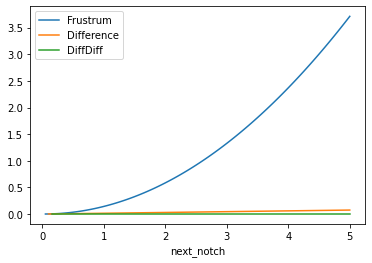

In [50]:
df.plot(x="next_notch", y=["Frustrum", "Difference", "DiffDiff"]);

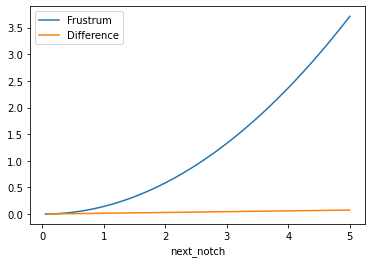

In [51]:
df.plot(x="next_notch", y=["Frustrum", "Difference"]);

In [52]:
frustrum(0, 1) + frustrum(1, 5)

125

In [53]:
frustrum(1, 5)

124

## Cheese Tetrahedron

In the explorations below, we're continuing to slice our tetrahedron parallel to any face.

In [54]:
from sympy.utilities.lambdify import lambdify

In [55]:
pd.set_option("display.precision", 10)

In [56]:
X = sp.Symbol('X')

In [57]:
notches = np.linspace(0, 5, 101)
notches

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
       2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
       3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
       3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
       4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
       4.95, 5.  ])

In [58]:
linear = 0.015 * X - 0.00075
quadratic = 0.15*X**2 - 0.0075*X + 0.000125
third_power = X**3

In [59]:
df2 = pd.DataFrame({"notch":notches})
df2

,notch
0,0.00
1,0.05
2,0.10
3,0.15
4,0.20
...,...
96,4.80
97,4.85
98,4.90
99,4.95


In [60]:
df2["Frustrum"] = [float(frustrum(df2.notch[i]-0.05, df2.notch[i])) for i in df2.index]
df2.iloc[0,1]=0
df2

,notch,Frustrum
0,0.00,0.000000
1,0.05,0.000125
2,0.10,0.000875
3,0.15,0.002375
4,0.20,0.004625
...,...,...
96,4.80,3.420125
97,4.85,3.492125
98,4.90,3.564875
99,4.95,3.638375


In [61]:
linear_f = lambdify(X, linear, 'numpy')

In [62]:
df2['linear'] = linear_f(df2.notch)

In [63]:
df2

,notch,Frustrum,linear
0,0.00,0.000000,-0.00075
1,0.05,0.000125,0.00000
2,0.10,0.000875,0.00075
3,0.15,0.002375,0.00150
4,0.20,0.004625,0.00225
...,...,...,...
96,4.80,3.420125,0.07125
97,4.85,3.492125,0.07200
98,4.90,3.564875,0.07275
99,4.95,3.638375,0.07350


In [64]:
df2['DiffFrustrum'] = df2.Frustrum.diff()
df2

,notch,Frustrum,linear,DiffFrustrum
0,0.00,0.000000,-0.00075,NaN
1,0.05,0.000125,0.00000,0.000125
2,0.10,0.000875,0.00075,0.000750
3,0.15,0.002375,0.00150,0.001500
4,0.20,0.004625,0.00225,0.002250
...,...,...,...,...
96,4.80,3.420125,0.07125,0.071250
97,4.85,3.492125,0.07200,0.072000
98,4.90,3.564875,0.07275,0.072750
99,4.95,3.638375,0.07350,0.073500


In [65]:
df2['Total_Volume'] = df2.Frustrum.cumsum()

In [66]:
df2

,notch,Frustrum,linear,DiffFrustrum,Total_Volume
0,0.00,0.000000,-0.00075,NaN,0.000000
1,0.05,0.000125,0.00000,0.000125,0.000125
2,0.10,0.000875,0.00075,0.000750,0.001000
3,0.15,0.002375,0.00150,0.001500,0.003375
4,0.20,0.004625,0.00225,0.002250,0.008000
...,...,...,...,...,...
96,4.80,3.420125,0.07125,0.071250,110.592000
97,4.85,3.492125,0.07200,0.072000,114.084125
98,4.90,3.564875,0.07275,0.072750,117.649000
99,4.95,3.638375,0.07350,0.073500,121.287375


## Earthling Volume (Cube)

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52144045592/in/photolist-2nrMS5Q-2nrTdGY-2nrAqZi-2mZypyZ-2e83WBd-24rcJCq-Ff836R" title="S3"><img src="https://live.staticflickr.com/65535/52144045592_20cacc3d1d.jpg" width="500" height="439" alt="S3"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Lets construct the unit XYZ cube with normal vectors, convert them to Quadrays, and feed them to our tetravolumes formula.  

To express the result in cubic volumes, we will need to convert out of tetravolumes using the Synergetics Constant S3 i.e. $\sqrt{9/8}$.

The relationship between XYZ and IVM that the Martians + Earthings have constructed (in the science fiction story behind Martian Math), assumes a CCP ball size in common, i.e. an IVM ball of radius R, diameter D.  

The unit XYZ cube has edges R, whereas the IVM tetrahedron has edges D.  Nevertheless, the $R^{3}$ cube has volume greater than $D^{3}$ by a scale factor of S3.

In the qrays module, the edges between any two elementary quadray tips is unity (the unity-2 of 2R).  With respect to 2R, the XYZ cube has edges half that length, or R.  So the X, Y and Z vectors of length R get entered with length 1/2 with respect to the IVM prime vector of length 1.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4903290928/in/album-72157624750749042/" title="Units of Volume"><img src="https://live.staticflickr.com/4136/4903290928_f185b32368.jpg" width="500" height="375" alt="Units of Volume"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [67]:
ex = qrays.Vector((1/2,0,0)) 
ey = qrays.Vector((0,1/2,0)) 
ez = qrays.Vector((0,0,1/2))

In [68]:
ex.angle(ey).evalf()

90.0000000000000

In [69]:
ex.angle(ez).evalf()

90.0000000000000

In [70]:
ey.angle(ez).evalf()

90.0000000000000

In [71]:
qx = ex.quadray()
qy = ey.quadray()
qz = ez.quadray()

In [72]:
qx.angle(qy).evalf()

90.0000000000000

In [73]:
S3 = sp.sqrt(9/8)
S3.evalf(30)

1.06066017177982119257251270028

In [74]:
def corner_vol(v0, v1, v2):
    uvt = Matrix([[*origin.coords,1],  # origin
                  [*v0.coords, 1],     # v0
                  [*v1.coords, 1],     # v1
                  [*v2.coords, 1],     # v2
                  [1,1,1,1,0]])
    return abs(uvt.det())/4

def tetra_vol(v0, v1, v2, v3):
    uvt = Matrix([[*v0.coords,1],      # v0
                  [*v1.coords, 1],     # v1
                  [*v2.coords, 1],     # v2
                  [*v3.coords, 1],     # v3
                  [1,1,1,1,0]])
    return abs(uvt.det())/4    

Lets test our volume function with the original basic Quadray tetrahedron of edges D and tetravolume 1.

In [75]:
qa = qrays.Qvector((1,0,0,0))
qb = qrays.Qvector((0,1,0,0))
qc = qrays.Qvector((0,0,1,0))
qd = qrays.Qvector((0,0,0,1))

In [76]:
tetra_vol(qa, qb, qc, qd)

1

Confirm or qx, qy, qz are the expected normal vectors of length R.

In [77]:
qx.xyz

xyz_vector(x=0.500000000000000, y=0, z=0)

In [78]:
qy.xyz

xyz_vector(x=0, y=0.500000000000000, z=0)

In [79]:
qz.xyz

xyz_vector(x=0, y=0, z=0.500000000000000)

The 90-90-90 tip tetrahedron is one 1/4 of 2/3 of the total cube, i.e. 4 such tips apply to an internal tetrahedron of 1/3 the total cube's volume.  I.E. 1/6th the total cube.  

So multiply the result we get, for the cube's tetrahedron tip (closing the lid on qx, qy, qz), by 6 to get the total cube volume.

In [80]:
(corner_vol(qx, qy, qz) * 6).evalf()

1.06066017177982

But we're still in tetravolumes.  

It takes fewer XYZ unit cubes (edges R) than IVM unit tetrahedrons (edges D) to fill the same volume, i.e. the XYZ unit cube is bigger by a scale factor of S3.  

So use 1/S3 when going from tetravolumes to cubic volumes i.e. it takes fewer of the latter so your constant is < 1.

In [81]:
(corner_vol(qx, qy, qz) * 6 * 1/S3).evalf()

1.00000000000000